# Ejercicio 4.4 (home)


En la inmobiliaria FeelGood han recopilado datos de precios de las casas que han
vendido últimamente.

Les gustaría poder predecir el precio de una casa a partir de los datos que disponen sobre
características de la casa y del barrio donde está situada. Así pueden dar ya un primer
precio de venta sin tener que llevar un tasador.

Las variables que vamos a usar son:
* ID --> Identificador de la casa
* crim --> Tasa de criminalidad per cápita por ciudad.
* zn --> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
* indus --> Proporción de acres de negocios no minoristas por ciudad.
* chas --> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).
* nox --> Concentración de óxidos de nitrógeno (partes por 10 millones).
* rm --> Número medio de habitaciones por vivienda.
* age --> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* dis --> Media ponderada de las distancias a cinco centros de empleo de Boston.
* rad --> Indice de accesibilidad a carreteras radiales.
* tax --> Impuesto sobre el valor total de la propiedad por 10.000 dólares.
* ptratio --> Proporción de alumnos por maestro por ciudad.
* black --> 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de color por ciudad.
* lstat --> Vn estatus más bajo de la población (porcentaje).
* medv --> Valor medio de las casas ocupadas por sus dueños en \ 1000 dólares. Será la variable target a predecir

Tenemos 4 ficheros:
* 2 train
* 2 predict

Primero tendremos que hacer un proceso de ETL ya que los datos de la casa están
separados de los datos del barrio (juntar los dos train entre ellos y los dos test entre ellos)
En predict, no tenemos la variable medv, que es la que tenemos que dar como respuesta

## 1.- Importar las librerías de Python necesarias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import itertools
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

## 2.- Proceso de ETL

### Carga de los ficheros de manera individual

In [2]:
PATH_NAME = './data/'
FILE_NAME1 = 'train_1.csv'
FILE_NAME2 = 'train_2.csv'
FILE_NAME3 = 'predict_1.csv'
FILE_NAME4 = 'predict_2.csv'

In [3]:
train1 = pd.read_csv(PATH_NAME+FILE_NAME1, sep=",")
train2 = pd.read_csv(PATH_NAME+FILE_NAME2, sep=",")
predict1 = pd.read_csv(PATH_NAME+FILE_NAME3, sep=",")
predict2 = pd.read_csv(PATH_NAME+FILE_NAME4, sep=",")

### Análisis de los datos por fichero

#### Train1

In [4]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv
0      1  18.0     0  6.575  4.0900    1  296  24.0
1      2   0.0     0  6.421  4.9671    2  242  21.6
2      4   0.0     0  6.998  6.0622    3  222  33.4
3      5   0.0     0  7.147  6.0622    3  222  36.2
4      7  12.5     0  6.012  5.5605    5  311  22.9
..   ...   ...   ...    ...     ...  ...  ...   ...
328  500   0.0     0  5.569  2.3999    6  391  17.5
329  502   0.0     0  6.593  2.4786    1  273  22.4
330  503   0.0     0  6.120  2.2875    1  273  20.6
331  504   0.0     0  6.976  2.1675    1  273  23.9
332  506   0.0     0  6.030  2.5050    1  273  11.9

[333 rows x 8 columns] 

Tipo de datos

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
medv    float64
dtype: object 

Existencia de Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
medv    0
dtype: int64 

Indices estadisticos

                ID          zn      

#### Train2

In [5]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train2.duplicated().any())

Vista del DF

       ID     crim  indus    nox   age  ptratio   black  lstat
0      1  0.00632   2.31  0.538  65.2     15.3  396.90   4.98
1      2  0.02731   7.07  0.469  78.9     17.8  396.90   9.14
2      4  0.03237   2.18  0.458  45.8     18.7  394.63   2.94
3      5  0.06905   2.18  0.458  54.2     18.7  396.90   5.33
4      7  0.08829   7.87  0.524  66.6     15.2  395.60  12.43
..   ...      ...    ...    ...   ...      ...     ...    ...
328  500  0.17783   9.69  0.585  73.5     19.2  395.77  15.10
329  502  0.06263  11.93  0.573  69.1     21.0  391.99   9.67
330  503  0.04527  11.93  0.573  76.7     21.0  396.90   9.08
331  504  0.06076  11.93  0.573  91.0     21.0  396.90   5.64
332  506  0.04741  11.93  0.573  80.8     21.0  396.90   7.88

[333 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

 ID       

#### Predict1

In [6]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax
0      3   0.0     0  7.185  4.9671    2  242
1      6   0.0     0  6.430  6.0622    3  222
2      8  12.5     0  6.172  5.9505    5  311
3      9  12.5     0  5.631  6.0821    5  311
4     10  12.5     0  6.004  6.5921    5  311
..   ...   ...   ...    ...     ...  ...  ...
168  496   0.0     0  5.670  2.7986    6  391
169  497   0.0     0  5.390  2.7986    6  391
170  499   0.0     0  6.019  2.4091    6  391
171  501   0.0     0  6.027  2.4982    6  391
172  505   0.0     0  6.794  2.3889    1  273

[173 rows x 7 columns] 

Tipo de datos

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
dtype: object 

Existencia de Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
dtype: int64 

Indices estadisticos

                ID          zn        chas          rm         dis         rad  \
count  173.000000  173.000000  173.000000  173.00000

#### Predict 2

In [7]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict2.duplicated().any())

Vista del DF

       ID     crim  indus    nox    age  ptratio   black  lstat
0      3  0.02729   7.07  0.469   61.1     17.8  392.83   4.03
1      6  0.02985   2.18  0.458   58.7     18.7  394.12   5.21
2      8  0.14455   7.87  0.524   96.1     15.2  396.90  19.15
3      9  0.21124   7.87  0.524  100.0     15.2  386.63  29.93
4     10  0.17004   7.87  0.524   85.9     15.2  386.71  17.10
..   ...      ...    ...    ...    ...      ...     ...    ...
168  496  0.17899   9.69  0.585   28.8     19.2  393.29  17.60
169  497  0.28960   9.69  0.585   72.9     19.2  396.90  21.14
170  499  0.23912   9.69  0.585   65.3     19.2  396.90  12.92
171  501  0.22438   9.69  0.585   79.7     19.2  396.90  14.33
172  505  0.10959  11.93  0.573   89.3     21.0  393.45   6.48

[173 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

### Unificar DataFrames "Train" y "Predict"

#### Train

In [8]:
train = pd.merge(train1,train2,how='inner', on='ID', validate='1:1')
train

,ID,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,1,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,2,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,4,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,5,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,7,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,502,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,503,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,504,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


In [9]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv     crim  indus    nox  \
0      1  18.0     0  6.575  4.0900    1  296  24.0  0.00632   2.31  0.538   
1      2   0.0     0  6.421  4.9671    2  242  21.6  0.02731   7.07  0.469   
2      4   0.0     0  6.998  6.0622    3  222  33.4  0.03237   2.18  0.458   
3      5   0.0     0  7.147  6.0622    3  222  36.2  0.06905   2.18  0.458   
4      7  12.5     0  6.012  5.5605    5  311  22.9  0.08829   7.87  0.524   
..   ...   ...   ...    ...     ...  ...  ...   ...      ...    ...    ...   
328  500   0.0     0  5.569  2.3999    6  391  17.5  0.17783   9.69  0.585   
329  502   0.0     0  6.593  2.4786    1  273  22.4  0.06263  11.93  0.573   
330  503   0.0     0  6.120  2.2875    1  273  20.6  0.04527  11.93  0.573   
331  504   0.0     0  6.976  2.1675    1  273  23.9  0.06076  11.93  0.573   
332  506   0.0     0  6.030  2.5050    1  273  11.9  0.04741  11.93  0.573   

      age  ptratio   black  lstat  
0    65.2   

#### Predict

In [190]:
predict = pd.merge(predict1, predict2, how='inner', on='ID', validate='1:1')
predict

,ID,zn,chas,rm,dis,rad,tax,crim,indus,nox,age,ptratio,black,lstat
0,3,0.0,0,7.185,4.9671,2,242,0.02729,7.07,0.469,61.1,17.8,392.83,4.03
1,6,0.0,0,6.430,6.0622,3,222,0.02985,2.18,0.458,58.7,18.7,394.12,5.21
2,8,12.5,0,6.172,5.9505,5,311,0.14455,7.87,0.524,96.1,15.2,396.90,19.15
3,9,12.5,0,5.631,6.0821,5,311,0.21124,7.87,0.524,100.0,15.2,386.63,29.93
4,10,12.5,0,6.004,6.5921,5,311,0.17004,7.87,0.524,85.9,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,496,0.0,0,5.670,2.7986,6,391,0.17899,9.69,0.585,28.8,19.2,393.29,17.60
169,497,0.0,0,5.390,2.7986,6,391,0.28960,9.69,0.585,72.9,19.2,396.90,21.14
170,499,0.0,0,6.019,2.4091,6,391,0.23912,9.69,0.585,65.3,19.2,396.90,12.92
171,501,0.0,0,6.027,2.4982,6,391,0.22438,9.69,0.585,79.7,19.2,396.90,14.33


In [11]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax     crim  indus    nox    age  \
0      3   0.0     0  7.185  4.9671    2  242  0.02729   7.07  0.469   61.1   
1      6   0.0     0  6.430  6.0622    3  222  0.02985   2.18  0.458   58.7   
2      8  12.5     0  6.172  5.9505    5  311  0.14455   7.87  0.524   96.1   
3      9  12.5     0  5.631  6.0821    5  311  0.21124   7.87  0.524  100.0   
4     10  12.5     0  6.004  6.5921    5  311  0.17004   7.87  0.524   85.9   
..   ...   ...   ...    ...     ...  ...  ...      ...    ...    ...    ...   
168  496   0.0     0  5.670  2.7986    6  391  0.17899   9.69  0.585   28.8   
169  497   0.0     0  5.390  2.7986    6  391  0.28960   9.69  0.585   72.9   
170  499   0.0     0  6.019  2.4091    6  391  0.23912   9.69  0.585   65.3   
171  501   0.0     0  6.027  2.4982    6  391  0.22438   9.69  0.585   79.7   
172  505   0.0     0  6.794  2.3889    1  273  0.10959  11.93  0.573   89.3   

     ptratio   black  lstat  
0     

# 3.- Selección de columnas

## Criterio propio

Eliminamos la columna ID, ya que no nos aporta valor para realizar las predicciones, y el target

In [12]:
train = train.drop(columns=['ID'])
train.head()

,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43


## Selección por correlación

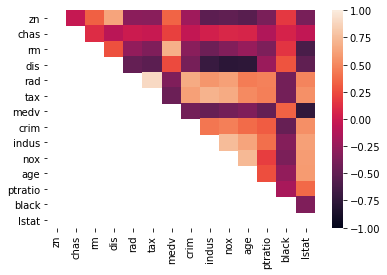

In [13]:
correlation_matrix = train.corr().where(~np.tril(np.ones(train.corr().shape)).astype(np.bool))
correlation_matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,)
plt.show()

In [14]:
correlation_table = correlation_matrix.stack().to_frame().reset_index()
correlation_table['corr_columns'] = correlation_table['level_0'] + ' - ' + correlation_table['level_1']
correlation_table = correlation_table.drop(columns=['level_0', 'level_1'])
correlation_table['values'] = correlation_table[0]
correlation_table = correlation_table[['corr_columns', 'values']]
deltacorr = 0.5
filter_1 = correlation_table['values'] > deltacorr
filter_2 = correlation_table['values'] < -deltacorr

correlation_table_1 = correlation_table.where(filter_1 | filter_2).groupby('corr_columns').sum().sort_values(by='values', ascending=False)
correlation_table_1

,values
corr_columns,
rad - tax,0.903562
indus - nox,0.750087
nox - age,0.736000
tax - indus,0.708313
rm - medv,0.689598
tax - nox,0.670722
rad - crim,0.666636
indus - age,0.638378
zn - dis,0.637142


In [15]:
correlation_table_cols = correlation_table_1.index.str.split(expand=True).to_frame().reset_index(drop=True)[[0,2]]

col1 = set(correlation_table_cols[0])
col2 = set(correlation_table_cols[2])
col1 |= col2

correlated_cols = list(col1)
train_cols = list(train.columns)

print(correlated_cols)
print(len(correlated_cols))

print(train_cols)
print(len(train_cols))

['rad', 'zn', 'medv', 'indus', 'rm', 'lstat', 'crim', 'dis', 'nox', 'age', 'tax']
11
['zn', 'chas', 'rm', 'dis', 'rad', 'tax', 'medv', 'crim', 'indus', 'nox', 'age', 'ptratio', 'black', 'lstat']
14


Podemos ver como tenemos un modelo altamente correlacionado, donde 11 de las 14 columnas que tenemos disponibles para realizar las predicciones presentan una correlación superior al 0,5 (catalogada como alta) con almenos una del resto de columnas.
    
Debido a los valores obtenido augmentaremos nuestro threshold de selección de 0,5 a 0,75.

In [16]:
deltacorr = 0.75
filter_3 = correlation_table['values'] > deltacorr
filter_4 = correlation_table['values'] < -deltacorr

correlation_table_2 = correlation_table.where(filter_3 | filter_4).groupby('corr_columns').sum().sort_values(by='values', ascending=False)
correlation_table_2

,values
corr_columns,
rad - tax,0.903562
indus - nox,0.750087
dis - age,-0.764208
dis - nox,-0.769364


Dadas las siguientes correlaciones decidimos prescindir de las columnas:
* tax, ya que presenta mayor correlación con otras columnas que rad
* age y nox, ya que ambas esta correlacionadas con dis, nox esta correlacionada con indus y ambas presentan un 0.73 de correlación entre ellas (se escapa del threshold definido pero es una correlación notable)

In [17]:
train = train.drop(columns = ["tax", "nox", "age"])
train.head()

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43


# 4.- Limpieza de datos

/home/emartino/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/emartino/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/emartino/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/emartin

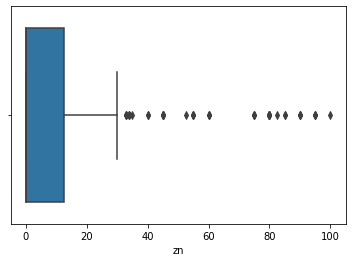

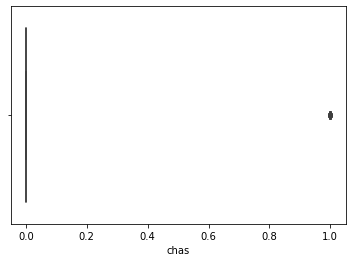

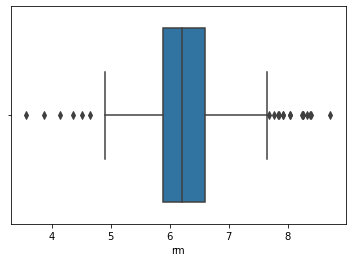

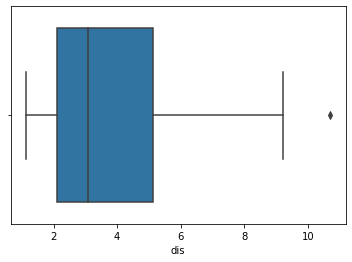

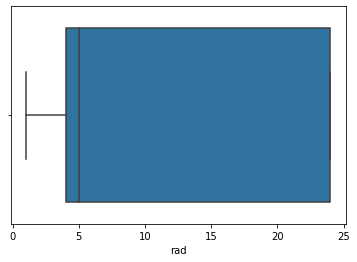

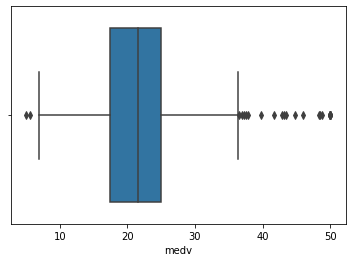

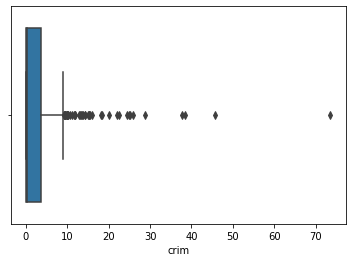

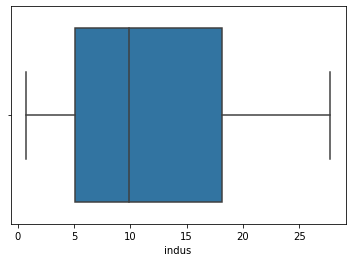

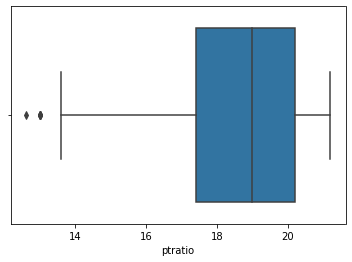

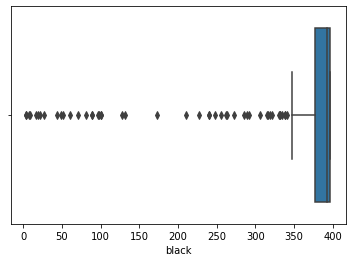

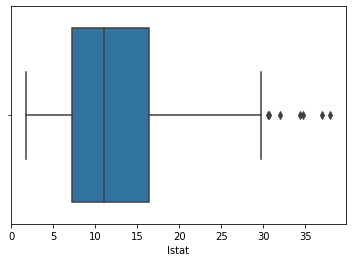

In [18]:
for col in train.columns:
  f, ax_new = plt.subplots(1)
  sns.boxplot(train[col], ax=ax_new)

## Outliers

In [19]:
# Ahora empezamos a eliminar outliers
# Segun el analisis con los Boxplot's, existe una gran cantidad de outliers en las variables "zn"(hacia el max),
# "crim" (hacia el max) y "black" (hacia el min).

meanzn = train['zn'].describe()['mean']
stdzn = train['zn'].describe()['std']
meancrim = train['crim'].describe()['mean']
stdcrim = train['crim'].describe()['std']
meanblack = train['black'].describe()['mean']
stdblack = train['black'].describe()['std']

n = 3 # aca se define la cantidad de sigmas a evaluar

train = train[train['zn']< (meanzn+n*stdzn)] # Se eliminan outliers de 'zn'
train = train[train['crim']< (meancrim+n*stdcrim)] # Se eliminan outliers de 'zn'
train = train[train['black']> (meanblack-n*stdblack)] # Se eliminan outliers de 'zn'
train

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0,5.569,2.3999,6,17.5,0.17783,9.69,19.2,395.77,15.10
329,0.0,0,6.593,2.4786,1,22.4,0.06263,11.93,21.0,391.99,9.67
330,0.0,0,6.120,2.2875,1,20.6,0.04527,11.93,21.0,396.90,9.08
331,0.0,0,6.976,2.1675,1,23.9,0.06076,11.93,21.0,396.90,5.64


# 5.- Entrenar al modelo supervisado de regresion

## Modelo de regresión lineal

### Preparación de los datos

In [20]:
train.columns

Index(['zn', 'chas', 'rm', 'dis', 'rad', 'medv', 'crim', 'indus', 'ptratio',
       'black', 'lstat'],
      dtype='object')

In [21]:
target = train.pop('medv')
target

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 295, dtype: float64

### Regresión lineal simple

"A simple linear regression is a linear regression model with a single explanatory variable"

Vamos a probar que resultados obtenemos al entrenar modelos de regresión lineal usando una sola variable.

Variable = zn
Costo de datos de train 0.06572928178486015
R2 Score 0.0857642837931385
MSEE 59.10123589916783
MAE 4.962786231651873


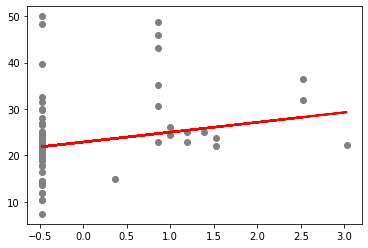





Variable = chas
Costo de datos de train 0.016656165251655364
R2 Score 0.07295272296225319
MSEE 59.92944580770675
MAE 5.225779952893934


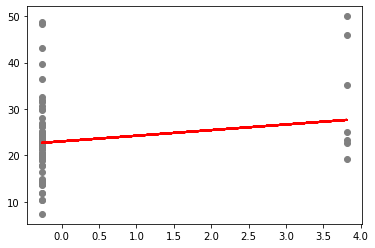





Variable = rm
Costo de datos de train 0.4328540807960598
R2 Score 0.5757709110141653
MSEE 27.424506633219085
MAE 3.3287977516103147


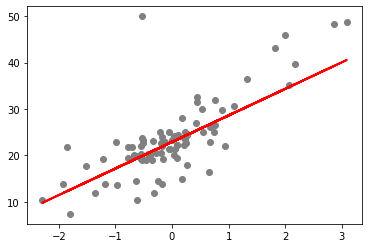





Variable = dis
Costo de datos de train 0.029038614755580783
R2 Score 0.008435600353148498
MSEE 64.10018822704302
MAE 5.1894858322807


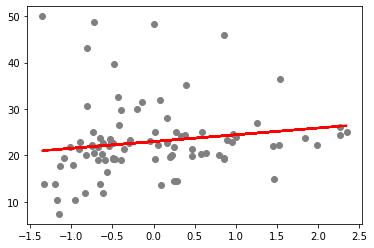





Variable = rad
Costo de datos de train 0.06701305885223774
R2 Score 0.04557927198648681
MSEE 61.69901655933446
MAE 5.32713228213209


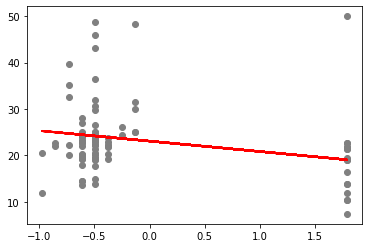





Variable = crim
Costo de datos de train 0.13453958975954894
R2 Score 0.1253411382174744
MSEE 56.54276988431521
MAE 5.002283320576633


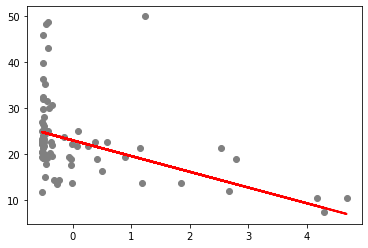





Variable = indus
Costo de datos de train 0.16922493608858546
R2 Score 0.17013755690995436
MSEE 53.646882465295256
MAE 5.158326642304095


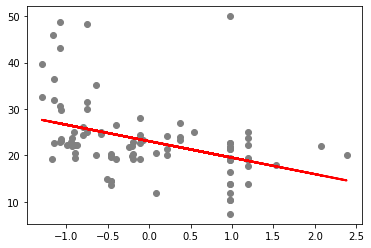





Variable = ptratio
Costo de datos de train 0.19257392008465846
R2 Score 0.1661213759570498
MSEE 53.90651053900054
MAE 5.124241296528066


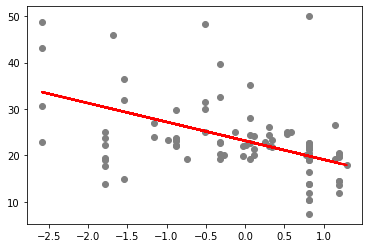





Variable = black
Costo de datos de train 0.03243207803549075
R2 Score 0.0008008868380251499
MSEE 64.59373819066944
MAE 5.307366197379528


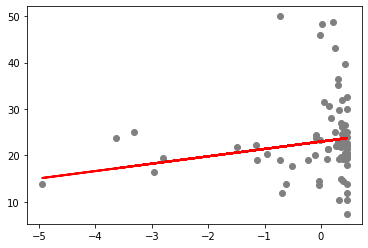





Variable = lstat
Costo de datos de train 0.5401651076771641
R2 Score 0.4016045861082387
MSEE 38.68357786778374
MAE 4.293097222143554


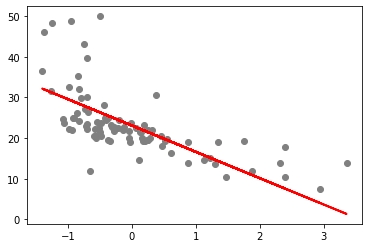

In [181]:
for feature_name in train.columns:
    feature = StandardScaler().fit_transform(train[feature_name].values.reshape((-1, 1)))
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=23)
    
    lr2 = LinearRegression()
    modelo = lr2.fit(X_train, y_train)
    
    print('Variable =',feature_name)    
    print('Costo de datos de train',lr2.score(X_train, y_train))
    y_pred=lr2.predict(X_test)
    print('R2 Score',r2_score(y_test,y_pred))
    print('MSEE',msee(y_test,y_pred))
    print('MAE',mae(y_test,y_pred))
    
    plt.scatter(X_test, y_test,  color='gray')
    plt.plot(X_test, y_pred, color='red', linewidth=2)
    plt.show()
    
    
    print('\n\n\n')
    

Podemos ver como con una sola variable los resultados de aplicar una regressión lineal no son aceptables. Por ese motivo, optamos por probar regressiones lineales multiples con todas las combinaciones posibles de nuestras variables features.

### Regresión lineal multiple

In [173]:
feature_names = train.columns
feature_names

Index(['zn', 'chas', 'rm', 'dis', 'rad', 'crim', 'indus', 'ptratio', 'black',
       'lstat'],
      dtype='object')

In [174]:
multiple_linear_regression_results = pd.DataFrame(columns=['Variables', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
multiple_linear_regression_results.head()

,Variables,Score train,R2 Score,MSEE,MAE


Eligimos un valor de partición pequeño (0.15) debido al reducido numero de muestras que tenemos. Preferimos maximizar el numero de datos que usamos para entrenar los modelos.

In [175]:
for n in range(2, len(feature_names)+1):
    for features_subset in itertools.combinations(feature_names, n):
        features_array = np.asarray(features_subset)
        
        features = StandardScaler().fit_transform(train[features_array])
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
        
        lr2 = LinearRegression()
        modelo = lr2.fit(X_train, y_train)
        
        y_pred = lr2.predict(X_test)
        y_test = y_test.values
        
        res_temp = pd.DataFrame([
            ['-'.join(features_array), 
             lr2.score(X_train, y_train),
             r2_score(y_test,y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
        ], columns=['Variables', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
        multiple_linear_regression_results = multiple_linear_regression_results.append(res_temp)

multiple_linear_regression_results = multiple_linear_regression_results.reset_index(drop=True)

In [179]:
#Top 10 combinaciones con mejor score de train
multiple_linear_regression_results.sort_values(by='Score train', ascending=False).head(10)

,Variables,Score train,R2 Score,MSEE,MAE,Media scores
1012,zn-chas-rm-dis-rad-crim-indus-ptratio-black-lstat,0.662019,0.685976,20.300214,3.101944,0.673998
1003,zn-chas-rm-dis-rad-crim-indus-ptratio-lstat,0.661922,0.685545,20.328073,3.114982,0.673734
1007,zn-chas-rm-dis-crim-indus-ptratio-black-lstat,0.660286,0.678487,20.784347,3.156442,0.669387
1006,zn-chas-rm-dis-rad-indus-ptratio-black-lstat,0.660210,0.688041,20.166762,3.092404,0.674126
968,zn-chas-rm-dis-crim-indus-ptratio-lstat,0.660183,0.678294,20.796837,3.169776,0.669239
964,zn-chas-rm-dis-rad-indus-ptratio-lstat,0.659984,0.688046,20.166425,3.110565,0.674015
971,zn-chas-rm-dis-indus-ptratio-black-lstat,0.659974,0.683059,20.488790,3.125146,0.671517
854,zn-chas-rm-dis-indus-ptratio-lstat,0.659797,0.683568,20.455904,3.138868,0.671683
1010,zn-rm-dis-rad-crim-indus-ptratio-black-lstat,0.659790,0.663276,21.767680,3.168558,0.661533
1011,chas-rm-dis-rad-crim-indus-ptratio-black-lstat,0.659749,0.680633,20.645653,3.147741,0.670191


In [180]:
multiple_linear_regression_results['Media scores'] = (multiple_linear_regression_results['Score train'] + multiple_linear_regression_results['R2 Score'])/2
multiple_linear_regression_results.sort_values(by='Media scores', ascending=False).head(10)

,Variables,Score train,R2 Score,MSEE,MAE,Media scores
1006,zn-chas-rm-dis-rad-indus-ptratio-black-lstat,0.660210,0.688041,20.166762,3.092404,0.674126
964,zn-chas-rm-dis-rad-indus-ptratio-lstat,0.659984,0.688046,20.166425,3.110565,0.674015
1012,zn-chas-rm-dis-rad-crim-indus-ptratio-black-lstat,0.662019,0.685976,20.300214,3.101944,0.673998
1003,zn-chas-rm-dis-rad-crim-indus-ptratio-lstat,0.661922,0.685545,20.328073,3.114982,0.673734
854,zn-chas-rm-dis-indus-ptratio-lstat,0.659797,0.683568,20.455904,3.138868,0.671683
971,zn-chas-rm-dis-indus-ptratio-black-lstat,0.659974,0.683059,20.488790,3.125146,0.671517
997,chas-rm-dis-rad-indus-ptratio-black-lstat,0.658255,0.682800,20.505582,3.136415,0.670527
928,chas-rm-dis-rad-indus-ptratio-lstat,0.658015,0.682740,20.509440,3.156289,0.670377
1011,chas-rm-dis-rad-crim-indus-ptratio-black-lstat,0.659749,0.680633,20.645653,3.147741,0.670191
994,chas-rm-dis-rad-crim-indus-ptratio-lstat,0.659632,0.680141,20.677423,3.162190,0.669887


Al definir que para el modelo de regresión lineal con combinación de variables, el mejor resultado lo entrega la combinación de INDEX "1012", grafiquemos las predicciones para esa condición observada versus los datos de test.

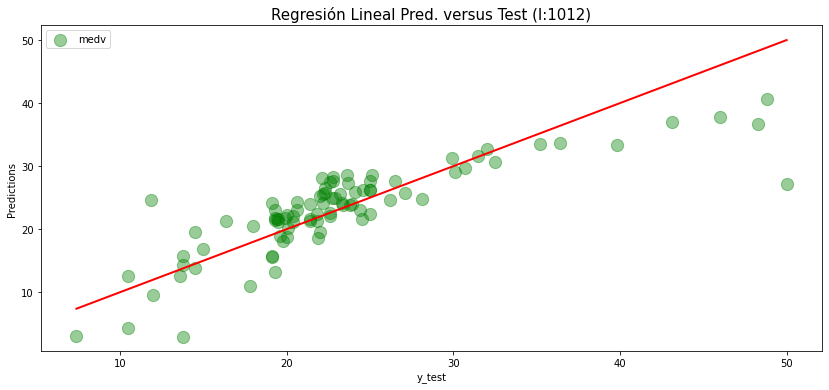

In [130]:
features3 = StandardScaler().fit_transform(train[multiple_linear_regression_results['Variables'][1012].split(" - ")])
X_train, X_test, y_train, y_test = train_test_split(features3, target, test_size=0.3, random_state=23)
        
lr2 = LinearRegression()
modelo = lr2.fit(X_train, y_train)
        
y_pred = lr2.predict(X_test)
y_test = y_test.values

plt.figure(figsize=(14,6))
plt.scatter(y_test,y_pred,alpha=0.4, c='g', s=150, label = 'medv')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.title('Regresión Lineal Pred. versus Test (I:1012)', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

Nos quedamos con la combinación con indice 1012. Nos proporciona los mejores de predicción con los datos de testing y, también, es la combinación más equilibrada entre los resultados de entrenamiento y testeo.

Seguidamente, le aplicamos cross validation para ver si conseguimos mejorar los resultados obtenidos hasta el momento.

### Modelo de regresión lineal con Cross Validation

In [29]:
optimal_feature_names = multiple_linear_regression_results.loc[1012]['Variables'].split(" - ")
optimal_feature_names

['zn',
 'chas',
 'rm',
 'dis',
 'rad',
 'crim',
 'indus',
 'ptratio',
 'black',
 'lstat']

In [158]:
optimal_features = StandardScaler().fit_transform(train[optimal_feature_names])

X_train, X_test, y_train, y_test = train_test_split(optimal_features, target, test_size=0.3)

clr = LinearRegression()

kf = KFold(n_splits=5)

modelo = clr.fit(X_train, y_train)

print('Score train',modelo.score(X_train, y_train))

scores = cross_val_score(modelo, X_train, y_train, cv=kf)

print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())


predicciones=clr.predict(X_test)

print('Score train', clr.score(X_train, y_train))
print('R2 Score',r2_score(y_test,predicciones))
print('MSEE',msee(y_test,predicciones))
print('MAE',mae(y_test,predicciones))

Score train 0.6800913702858653
Metricas cross_validation [0.5868357  0.63398506 0.42612164 0.70162574 0.55295321]
Media de cross_validation 0.5803042685253246
Score train 0.6800913702858653
R2 Score 0.6338755044100923
MSEE 32.585521065422235
MAE 4.0728067824808525


Los resultados con cross validation no nos mejoran. Optamos por probar otro tipo de algoritmos de regresión en busca de mejores resultados.

## Regression polinomial

In [159]:
polinomial_regression_results = pd.DataFrame(columns=['Variables', 'Degree', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
polinomial_regression_results.head()

,Variables,Degree,Score train,R2 Score,MSEE,MAE


In [160]:
for n in range(2, len(feature_names)+1):
    for features_subset in itertools.combinations(feature_names, n):
        features_array = np.asarray(features_subset)
        
        features = StandardScaler().fit_transform(train[features_array])
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
        
        X_poly_train = PolynomialFeatures(degree=int(n)).fit_transform(X_train)
        X_poly_test = PolynomialFeatures(degree=int(n)).fit_transform(X_test)

        lin_reg = LinearRegression()
        modelo = lin_reg.fit(X_poly_train, y_train)
        
        y_pred = modelo.predict(X_poly_test)
        y_test = y_test.values
        
        res_temp = pd.DataFrame([
            [' - '.join(features_array), 
             n,
             modelo.score(X_poly_train, y_train),
             r2_score(y_test,y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
        ], columns=['Variables', 'Degree', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
        polinomial_regression_results = polinomial_regression_results.append(res_temp) 

In [161]:
# Top 10 combinaciones con mejor score de train
polinomial_regression_results.sort_values(by='Score train', ascending=False).head(10)

,Variables,Degree,Score train,R2 Score,MSEE,MAE
0,zn - chas - rm - dis - rad - crim - indus - pt...,10,1.0,-4.574353e+06,2.957115e+08,2710.704278
0,chas - rm - dis - rad - crim - ptratio,6,1.0,-1.372456e+04,8.872961e+05,304.241280
0,zn - dis - crim - indus - ptratio - black,6,1.0,-5.829160e+07,3.768291e+09,8039.859942
0,zn - dis - crim - indus - ptratio - lstat,6,1.0,-4.446726e+04,2.874674e+06,511.419554
0,zn - dis - crim - indus - black - lstat,6,1.0,-1.532899e+04,9.910148e+05,299.856359
0,zn - dis - crim - ptratio - black - lstat,6,1.0,-1.618168e+06,1.046073e+08,1467.656734
0,zn - dis - indus - ptratio - black - lstat,6,1.0,-5.855122e+06,3.785074e+08,4483.494644
0,zn - rad - crim - indus - black - lstat,6,1.0,-2.352296e+07,1.520654e+09,5710.217736
0,zn - rad - crim - ptratio - black - lstat,6,1.0,-1.803212e+08,1.165696e+10,13748.754411
0,zn - crim - indus - ptratio - black - lstat,6,1.0,-2.248281e+07,1.453413e+09,4869.612679


In [163]:
# Top 10 combinaciones con mejor score de test
polinomial_regression_results.sort_values(by='R2 Score', ascending=False).head(10)

,Variables,Degree,Score train,R2 Score,MSEE,MAE
0,rm - rad - lstat,3,0.838762,0.807830,12.422931,2.529665
0,rm - dis - lstat,3,0.832980,0.784368,13.939626,2.442966
0,rm - indus - lstat,3,0.821180,0.754456,15.873334,2.636600
0,rm - crim - lstat,3,0.846488,0.747609,16.315936,2.746719
0,rm - dis - ptratio - lstat,4,0.906908,0.730560,17.418064,2.800907
0,zn - rm - rad - lstat,4,0.886099,0.723152,17.896955,2.795014
0,dis - ptratio - lstat,3,0.790290,0.714684,18.444416,2.964252
0,rm - dis - indus - lstat,4,0.911625,0.710469,18.716903,3.186360
0,rm - lstat,2,0.752494,0.695746,19.668674,2.900864
0,rm - ptratio - lstat,3,0.797268,0.695362,19.693489,2.922550


In [165]:
polinomial_regression_results['Media scores'] = (polinomial_regression_results['Score train'] + polinomial_regression_results['R2 Score'])/2
polinomial_regression_results.sort_values(by='Media scores', ascending=False).head(10)

,Variables,Degree,Score train,R2 Score,MSEE,MAE,Media scores
0,rm - rad - lstat,3,0.838762,0.807830,12.422931,2.529665,0.823296
0,rm - dis - ptratio - lstat,4,0.906908,0.730560,17.418064,2.800907,0.818734
0,rm - dis - indus - lstat,4,0.911625,0.710469,18.716903,3.186360,0.811047
0,rm - dis - lstat,3,0.832980,0.784368,13.939626,2.442966,0.808674
0,zn - rm - rad - lstat,4,0.886099,0.723152,17.896955,2.795014,0.804626
0,rm - crim - lstat,3,0.846488,0.747609,16.315936,2.746719,0.797048
0,rm - indus - lstat,3,0.821180,0.754456,15.873334,2.636600,0.787818
0,dis - rad - ptratio - lstat,4,0.844593,0.686620,20.258633,3.258159,0.765606
0,dis - crim - indus - lstat,4,0.885208,0.624106,24.299846,3.599362,0.754657
0,dis - ptratio - lstat,3,0.790290,0.714684,18.444416,2.964252,0.752487


En Regresión Polinomial, se observa una mejora en los resultados del modelo en comparación con Regregión Lineal. Se observa que los modelos con mejores "Score train" tienen a la vez los peores "R2 Score", ya al ordenar por la media del "Score test" y el "R2 Score", se observan los mejores modelos. La combinación de variables "rm - rad - lstat", entrega mejores resultados por lo que se graficara su predicciones frente a los valores de test.

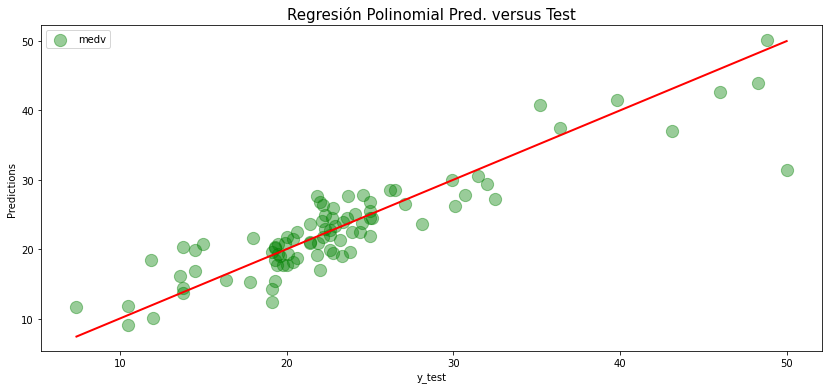

In [140]:
features4 = StandardScaler().fit_transform(train[['rm','rad','lstat']])
X_train, X_test, y_train, y_test = train_test_split(features4, target, test_size=0.3, random_state=23)
        
        
X_poly_train = PolynomialFeatures(degree=int(3)).fit_transform(X_train)
X_poly_test = PolynomialFeatures(degree=int(3)).fit_transform(X_test)

lin_reg1 = LinearRegression()
modelo = lin_reg1.fit(X_poly_train, y_train)
        
y_pred = modelo.predict(X_poly_test)
y_test = y_test.values

plt.figure(figsize=(14,6))
plt.scatter(y_test,y_pred,alpha=0.4, c='g', s=150, label = 'medv')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.title('Regresión Polinomial Pred. versus Test', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

## Random Forest

In [184]:
random_forest_results = pd.DataFrame(columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for a in range(100,1100,100):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
    rf3 = RandomForestRegressor(n_estimators = int(a), random_state = 42)
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)
    
    res_temp = pd.DataFrame([[ 
             str(a),
             rf3.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    random_forest_results = random_forest_results.append(res_temp)

random_forest_results = random_forest_results.reset_index(drop=True)

In [185]:
# Combinaciones de resultados de Random Forest
random_forest_results.sort_values(by='R2 Score', ascending=False)

,"Valor de ""n""",Score train,R2 Score,MSEE,MAE
7,800,0.973712,0.859043,9.112268,2.188065
2,300,0.973821,0.858923,9.119995,2.189532
3,400,0.973905,0.858872,9.123289,2.188857
1,200,0.974385,0.858426,9.152143,2.208640
8,900,0.973671,0.858378,9.155258,2.191302
6,700,0.973836,0.858075,9.174822,2.194159
9,1000,0.973980,0.857255,9.227803,2.196164
5,600,0.974133,0.857174,9.233088,2.203912
4,500,0.973578,0.856952,9.247418,2.196784
0,100,0.971764,0.855491,9.341829,2.210798


Para el modelo por Random Forest, mejora bastante los modelos, entregando los mejores "Score train" hasta ahora, ademas de dar un buen "R2 Score" lo que muestra buenos resultados para poder utilizarlos este modelo como predictivo final. Se grafica el Random Forest con n igual a 800 ya que tiene el mejor "R2 Score".

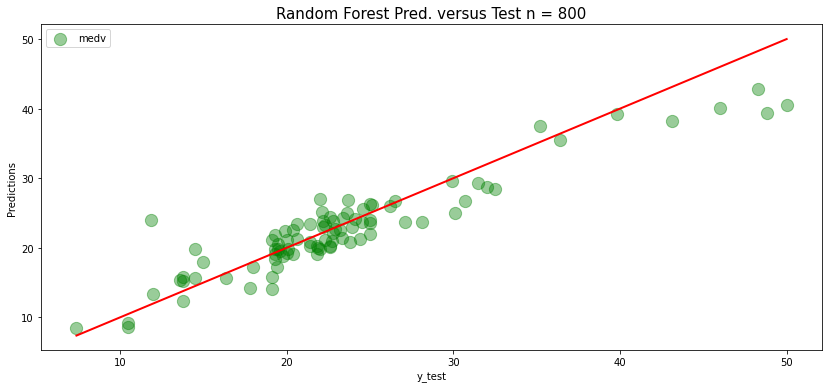

In [145]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
rf4 = RandomForestRegressor(n_estimators = 800, random_state = 42)
rf4.fit(X_train, y_train)
y_pred = rf4.predict(X_test)

plt.figure(figsize=(14,6))
plt.scatter(y_test,y_pred,alpha=0.4, c='g', s=150, label = 'medv')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.title('Random Forest Pred. versus Test n = 800', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

## Neural Net

### Variando numero de iteraciones y con una sola capa de 100 neuronas

In [148]:
net_results = pd.DataFrame(columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for i in range(500,1200,100):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=0.3)
    net = MLPRegressor(random_state=1, max_iter=i).fit(X_train, y_train)
    y_pred = net.predict(X_test)
    
    res_temp = pd.DataFrame([[ 
             str(i),
             net.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    net_results = net_results.append(res_temp)

net_results.reset_index(drop=True)

/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converge

,Cantidad de iteraciones,Score train,R2 Score,MSEE,MAE
0,500,0.736520,0.749986,21.662450,3.603507
1,600,0.767657,0.761409,20.672707,3.489410
2,700,0.794773,0.763403,20.499948,3.461327
3,800,0.816312,0.761885,20.631428,3.449374
4,900,0.821581,0.771276,19.817743,3.410889
5,1000,0.821581,0.771276,19.817743,3.410889
6,1100,0.821581,0.771276,19.817743,3.410889


### 100 neuronas totales, 900 iteraciones y variando el numero de capas

In [155]:
distribuciones = [(60,40,), (50,30,20,), (40,30,20,10,)]

for n in range(1,4):
    hidden_layer_sizes = distribuciones[n-1]
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1, test_size=0.3)
    net = MLPRegressor(random_state=n, max_iter=900, hidden_layer_sizes=hidden_layer_sizes).fit(X_train, y_train)
    y_pred = net.predict(X_test)
    
    print('Numero de Hiden layers = ', len(hidden_layer_sizes))
    print('Score del entrenamiento',net.score(X_train,y_train))
    print('R2 Score',r2_score(y_pred,y_test))
    print('\n\n')

Numero de Hiden layers =  2
Score del entrenamiento 0.7972375598530819
R2 Score 0.7083274504035724



Numero de Hiden layers =  3
Score del entrenamiento 0.8977865835664868
R2 Score 0.6939137505787298



Numero de Hiden layers =  4
Score del entrenamiento 0.7796823439967001
R2 Score 0.5627390937321903





Al realizar la "Neural Net", se prueban distintas configuraciones de red. Primero se realiza una red con solo una Hiden Layer y 100 neuronas, en esta se prueba para distinto numero de iteraciones en donde se observa que sobre 900 iteraciones, el modelo ya no se ajusta mas llegando al valor de "Convergencia". Al ir probando con mas Hiden layers y manteniendo la cantidad de neuronas (con 900 iteraciones), se observan mejores resultados para "Score train" con 3 capas pero no asi para el "R2 Score". Se grafica el mejor modelo de "Neural Net" con una capa de 100 neuronas y 900 iteraciones.

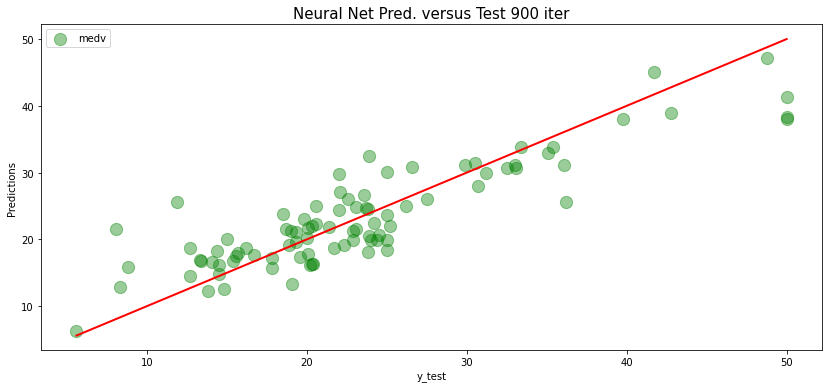

In [156]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
net = MLPRegressor(random_state=1, max_iter=900).fit(X_train, y_train)
y_pred = net.predict(X_test)

plt.figure(figsize=(14,6))
plt.scatter(y_test,y_pred,alpha=0.4, c='g', s=150, label = 'medv')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.title('Neural Net Pred. versus Test 900 iter', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

## Modelos sin variable "black"

### Random Forest 
##### Particion de datos de train y variando n

In [182]:
train1 = train.drop(columns = 'black')
features_sin_black = StandardScaler().fit_transform(train1)
random_forest_results1 = pd.DataFrame(columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for a in range(100,1000,100):
    X_train, X_test, y_train, y_test = train_test_split(features_sin_black, target, test_size=0.3)
    rf3 = RandomForestRegressor(n_estimators = int(a), random_state = 42)
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)
    res_temp = pd.DataFrame([[ 
             str(a),
             rf3.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    random_forest_results1 = random_forest_results1.append(res_temp)

In [183]:
# Combinaciones de resultados de Random Forest
random_forest_results1.sort_values(by='R2 Score', ascending=False)

,"Valor de ""n""",Score train,R2 Score,MSEE,MAE
0,900,0.975896,0.888902,6.868902,1.934573
0,300,0.975113,0.857640,10.158844,2.369348
0,600,0.971408,0.851737,14.318710,2.783625
0,700,0.975499,0.828221,14.563767,2.656986
0,400,0.966543,0.827756,13.520540,2.721756
0,500,0.975423,0.808932,13.266331,2.536449
0,100,0.970759,0.785687,19.342866,3.191191
0,200,0.976973,0.783902,13.260486,2.565213
0,800,0.973548,0.744670,20.318826,2.746861


### Neural Net
##### Variando numero de iteraciones, solo una capa con 100 neuronas

In [206]:
net_results = pd.DataFrame(columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for i in range(500,1200,100):
    X_train, X_test, y_train, y_test = train_test_split(features2, target, random_state=1, test_size=0.3)
    net = MLPRegressor(random_state=1, max_iter=i).fit(X_train, y_train)
    y_pred = net.predict(X_test)
    
    res_temp = pd.DataFrame([[ 
             str(i),
             net.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    net_results = net_results.append(res_temp)

net_results.reset_index(drop=True)

/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/juanpablocarranza/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converge

,Cantidad de iteraciones,Score train,R2 Score,MSEE,MAE
0,500,0.750533,0.799581,17.365271,3.216387
1,600,0.777766,0.797479,17.547444,3.146681
2,700,0.793463,0.808527,16.590193,3.022113
3,800,0.808945,0.811024,16.373783,3.080222
4,900,0.813546,0.805334,16.866788,3.141654
5,1000,0.813546,0.805334,16.866788,3.141654
6,1100,0.813546,0.805334,16.866788,3.141654


# Resultados

# Modelo de Random Forest con n = 900  

In [191]:
# Entrenando el modelo seleccionado
X_train, X_test, y_train, y_test = train_test_split(features_sin_black, target, test_size=0.3)
RandomForest_Modelo = RandomForestRegressor(n_estimators = 900, random_state = 42)
RandomForest_Modelo.fit(X_train, y_train)

# Preparando los datos de entrada nuevos

predict = predict.drop(columns = ["ID","tax", "nox", "age","black"])

medv_predichos = RandomForest_Modelo.predict(predict)
medv_predichos

array([34.91866667, 34.91866667, 34.805     , 34.805     , 34.805     ,
       34.75955556, 34.75955556, 34.75955556, 34.76733333, 34.75955556,
       34.75955556, 34.79255556, 34.21522222, 34.63066667, 34.91866667,
       34.922     , 34.922     , 34.922     , 34.922     , 34.80166667,
       34.805     , 34.805     , 34.805     , 34.922     , 34.91866667,
       34.922     , 34.80166667, 34.91866667, 34.80166667, 34.922     ,
       34.922     , 34.922     , 34.91866667, 34.922     , 34.922     ,
       34.922     , 34.922     , 34.922     , 34.922     , 34.922     ,
       34.78511111, 34.95233333, 34.84655556, 34.79366667, 34.92233333,
       32.72611111, 33.05055556, 33.836     , 34.18544444, 34.65588889,
       32.79477778, 34.63144444, 34.22688889, 33.74166667, 34.922     ,
       34.91866667, 34.805     , 34.808     , 34.80366667, 34.80366667,
       34.80366667, 34.80166667, 34.922     , 34.834     , 34.922     ,
       34.922     , 34.922     , 34.91866667, 34.922     , 34.92

Text(0.5, 1.0, 'Resultados del modelo con nuevos datos')

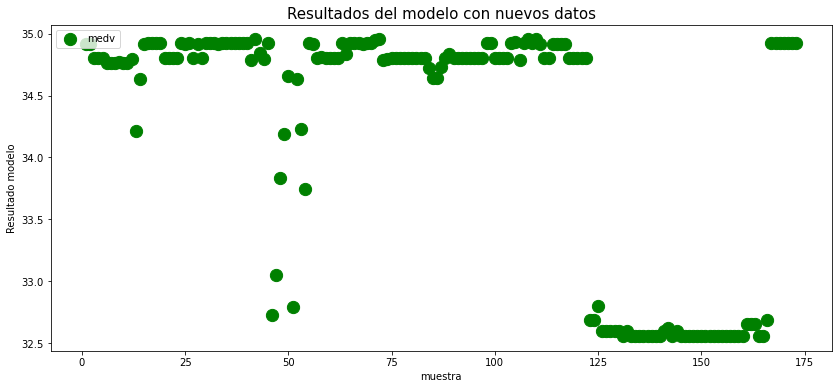

In [217]:
sample = []
for i in range(len(medv_predichos)):
    sample.append(i+1)

plt.figure(figsize=(14,6))
plt.scatter(sample,medv_predichos, c='g', s=150, label = 'medv')
plt.xlabel('muestra')
plt.ylabel('Resultado modelo')
plt.legend(loc='upper left')
plt.title('Resultados del modelo con nuevos datos', fontsize=15)


In [207]:
X_train, X_test, y_train, y_test = train_test_split(features_sin_black, target, random_state=1)
net_comparar = MLPRegressor(random_state=1, max_iter=900).fit(X_train, y_train)
medv_predichos_comparar = net_comparar.predict(predict)
r2_score(medv_predichos,medv_predichos_comparar)

-1832.806283772935

Text(0.5, 1.0, 'Resultados del modelo con nuevos datos')

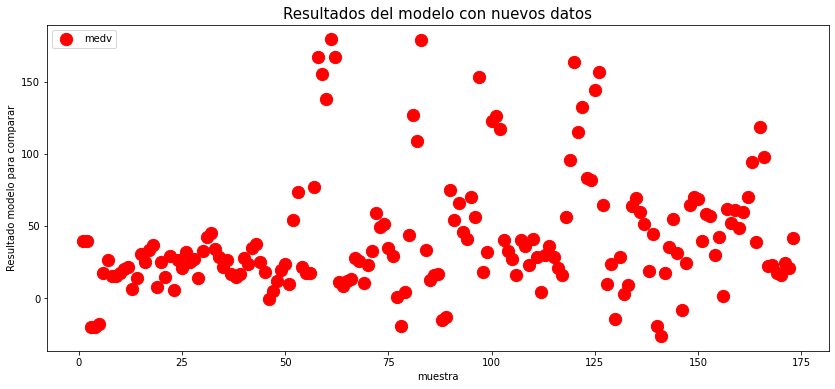

In [221]:
plt.figure(figsize=(14,6))
plt.scatter(sample,medv_predichos_comparar, c='r', s=150, label = 'medv')
plt.xlabel('muestra')
plt.ylabel('Resultado modelo para comparar')
plt.legend(loc='upper left')
plt.title('Resultados del modelo con nuevos datos', fontsize=15)

Text(0.5, 1.0, 'Resultados del modelo con nuevos datos')

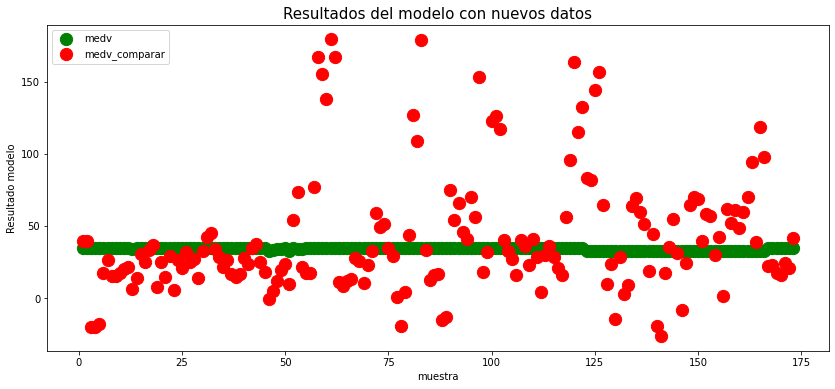

In [219]:
plt.figure(figsize=(14,6))
plt.scatter(sample,medv_predichos, c='g', s=150, label = 'medv')
plt.scatter(sample,medv_predichos_comparar, c='r', s=150, label = 'medv_comparar')
plt.xlabel('muestra')
plt.ylabel('Resultado modelo')
plt.legend(loc='upper left')
plt.title('Resultados del modelo con nuevos datos', fontsize=15)

# Conclusiones

1) Dentro de los modelos de regresión de Machine Learning Supervisado realizados, el que tiene los mejores resultados frente a los datos de entrenamiento como a los datos de test, es el modelo de "Random Forest". Esto principalmente por el valor de R2 obtenido frente a las predicciones del modelo, los cuales servira para poder dar prediccion a las muestras del dataset que no tienen valor objetivo del "medv".

2) El modelo de "Regresion Lineal", no supero valores de "Score" sobre el 0.7 ni tampoco de "R2 Score" sobre este valor, lo que no entrego resultados deseados.

3) El modelo de "Regresion Polinomial" mejoro los valores de coste sobre los datos de entrenamiento del modelo frente al de Regresion lineal, pero no obtenia buenos resultados de "R2 Score" con los datos de test, por lo que aun no se podia considerar un modelo optimo.

3) El modelo de "Random Forest" mejoro considerablemente los resultados, obteniendo valores sobre el 0.85 tanto en el "Score train" como en el "R2 Score", lo que demuestra que es un buen modelo para poder utilizar con datos nuevos.

4) La "Neuronal Net", tambien tuvo buenos resultados en el "Score train" y el "R2 Score", pero no supero la bondad del modelo de "Random Forest", por lo que si bien es un buen modelo para este data set, finalmente el que mas se adecua a los datos de entrenamiento fue el modelo anterior. Se pudo observar que al aumentar la cantidad de "Hiden Layers" en el modelo, este no mejoraba pero si mejoro su "Score train" al tener 2 "Hiden layers", luego al seguir aumentando capas este modelo empeoro en comparación al tener solo una capa.

5) Se realiza los dos mejores modelos observados ("Random Forest" y "Neuronal Net") con el data set sin la variable "black", esto considerando que es una variable que se podria considerar delicada frente a posibles temas de discriminación racial. Aun asi al eliminarla, los modelos mejoran sus resultados, por lo que podria ser prudente mencionarle al cliente esta opción considerando lo delicado de la información entregada.